# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

Comentarios: es mas costoso tener un fraude y no detectarlo, que lo contrario

In [4]:
X = df.drop('Label',1)
y = df['Label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(92943, 15) (45778, 15) (92943,) (45778,)


In [6]:
# fit a logistic regression model and store the class predictions
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn import metrics
print('f1:',metrics.f1_score(y_test,y_pred))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('f_beta:',metrics.fbeta_score(y_test,y_pred,beta=10))

/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1: 0.0
accuracy: 0.9939053693914107
f_beta: 0.0


/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
# fit a decision tree model and store the class predictions
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

from sklearn import metrics
print('f1:',metrics.f1_score(y_test,y_pred))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('f_beta:',metrics.fbeta_score(y_test,y_pred,beta=10))

f1: 0.12600969305331178
accuracy: 0.9881820962034165
f_beta: 0.1414667432840109


In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
plt.style.use('ggplot')

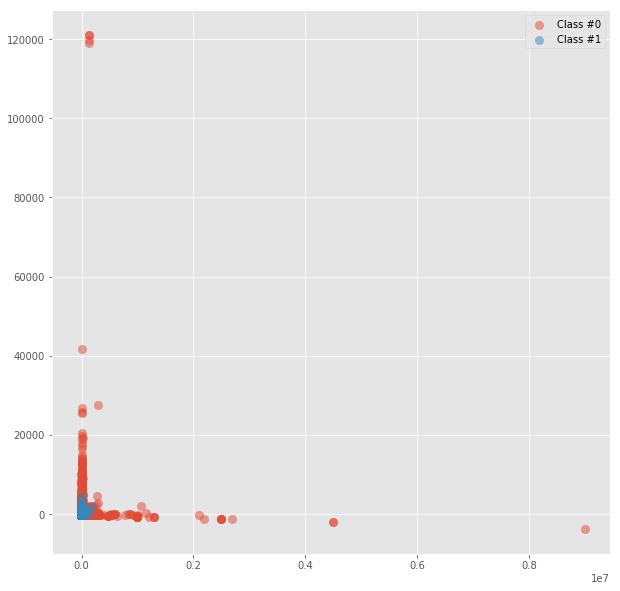

In [12]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)

# Fit and transform x to visualise inside a 2D feature space
x_vis = pca.fit_transform(X_train)

# Plot the original data

def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

plot_two_classes(x_vis, y_train)

# Exercise 15.2
Desde el principio partir la base en training and test. Semilla aleatoria = 42.

Under-sample the negative class using random-under-sampling

Prueben diferentes y mirar como les va variando

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [13]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  5084 y.mean() =  0.1026750590086546


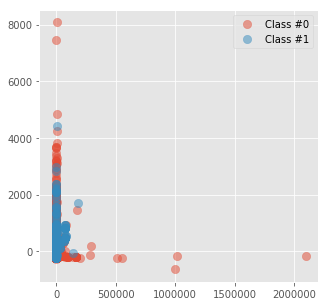

Target percentage 0.2
y.shape =  2557 y.mean() =  0.2041454829878764


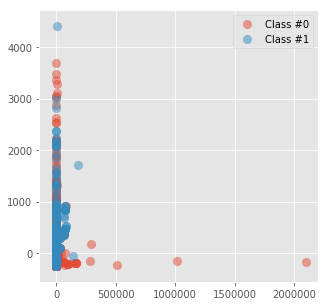

Target percentage 0.3
y.shape =  1731 y.mean() =  0.30155979202772965


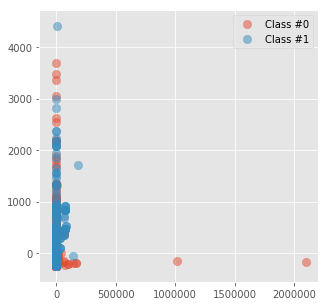

Target percentage 0.4
y.shape =  1295 y.mean() =  0.40308880308880307


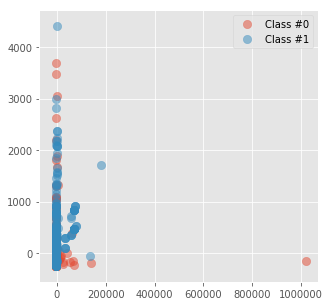

Target percentage 0.5
y.shape =  1020 y.mean() =  0.5117647058823529


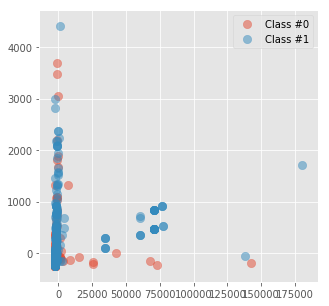

In [15]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_vis, y_train, target_percentage, 42)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()

In [28]:
X_u, y_u = UnderSampling(X_train, y_train, 0.5, 42)
print (X_u.shape, y_u.shape)

(1020, 15) (1020,)


In [29]:
# fit a logistic regression model and store the class predictions
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_u, y_u)
y_pred = logreg.predict(X_test)

from sklearn import metrics
print('f1:',metrics.f1_score(y_test,y_pred))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('f_beta:',metrics.fbeta_score(y_test,y_pred,beta=10))

f1: 0.02082859094013203
accuracy: 0.6241426012495085
f_beta: 0.41259459338795007


In [30]:
# fit a decision tree model and store the class predictions
tree = DecisionTreeClassifier()
tree.fit(X_u, y_u)
y_pred = tree.predict(X_test)

from sklearn import metrics
print('f1:',metrics.f1_score(y_test,y_pred))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('f_beta:',metrics.fbeta_score(y_test,y_pred,beta=10))

f1: 0.022239462115334886
accuracy: 0.6696229629953253
f_beta: 0.4069051132504158


# Exercise 15.3

Same analysis using random-over-sampling

In [39]:
X_train.to_numpy()

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

In [37]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=42):
    X=X.to_numpy()
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

/Users/davidfajardo/anaconda3/lib/python3.5/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Target percentage 0.1
y.shape =  102690 y.mean() =  0.005804118299014175


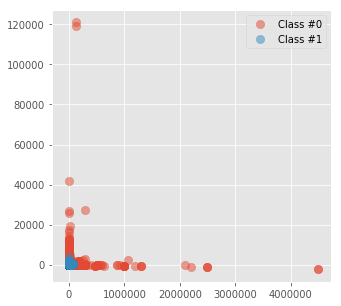

Target percentage 0.2
y.shape =  115526 y.mean() =  0.005415584415584415


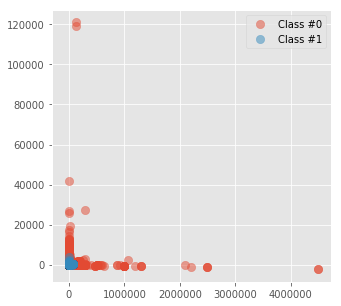

Target percentage 0.3
y.shape =  132030 y.mean() =  0.0050625406200472045


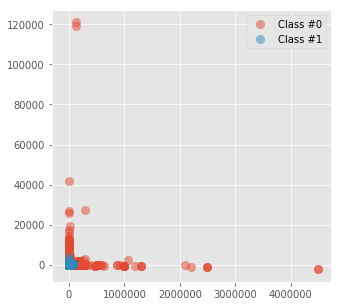

Target percentage 0.4
y.shape =  154035 y.mean() =  0.004650343146373222


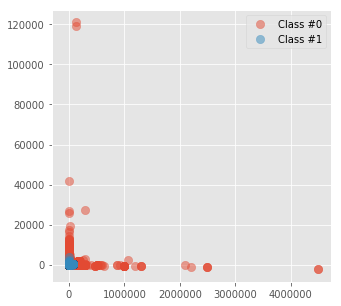

Target percentage 0.5
y.shape =  184842 y.mean() =  0.004437664678962696


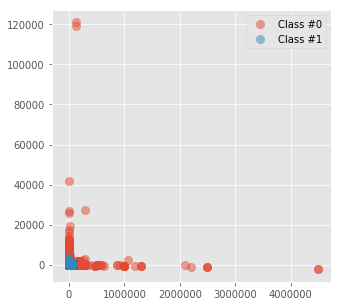

In [35]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_vis, y_train, target_percentage, 42)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()

In [38]:
X_u, y_u = OverSampling(X_train, y_train, 0.5, 42)
print (X_u.shape, y_u.shape)

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

In [105]:
# fit a logistic regression model and store the class predictions
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_u, y_u)
y_pred = logreg.predict(X_test)

from sklearn import metrics
print('f1:',metrics.f1_score(y_test,y_pred))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('f_beta:',metrics.fbeta_score(y_test,y_pred,beta=10))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [106]:
# fit a decision tree model and store the class predictions
tree = DecisionTreeClassifier()
tree.fit(X_u, y_u)
y_pred = tree.predict(X_test)

from sklearn import metrics
print('f1:',metrics.f1_score(y_test,y_pred))
print('accuracy:',metrics.accuracy_score(y_test,y_pred))
print('f_beta:',metrics.fbeta_score(y_test,y_pred,beta=10))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

2 semanas, esta en el notebook, jugar con los parametros. no hagn un grid search sobre muchos n vecinos y muchos target percentage.

Which parameters did you choose?

# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

# Exercise 15.6 (3 points)

Compare and comment about the results
Tabla, undersamploing con 0.20 me dio esto y etc.
Pandas donde el idncie es todos los modelos que hicieron y las columnas son todos los resultados. Todo en la base de test, que no se vio impactada con los muestreos.